In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns   

songstats = pd.read_csv("Warda.csv")

del songstats["Unnamed: 0"]
songstats

,album,track_number,id,name,uri,release_date,key,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Hakollak Hagah,1,3cbxGQxZJytXNR7wNiM5NN,أكون سعيد,spotify:track:3cbxGQxZJytXNR7wNiM5NN,2009,6,374253,0.993,0.421,0.0919,0.01600,0.230,-15.139,0.0433,106.808,0.289,10
1,Hakollak Hagah,2,6LYc6G3vrztV5YlDHjtWTk,ليه عزيز دمعى,spotify:track:6LYc6G3vrztV5YlDHjtWTk,2009,2,361507,0.995,0.373,0.0666,0.75100,0.304,-18.202,0.0534,66.791,0.286,9
2,Hakollak Hagah,3,58kKXV7vmEdAHaSM74Kjns,هوده يخلص من الله,spotify:track:58kKXV7vmEdAHaSM74Kjns,2009,5,541027,0.996,0.400,0.0922,0.88500,0.669,-20.688,0.0530,112.787,0.216,7
3,Hakollak Hagah,4,7rKhQ0tmutER7pXdCLtarZ,أمانا إيها القمر المطل,spotify:track:7rKhQ0tmutER7pXdCLtarZ,2009,10,432493,0.992,0.407,0.1690,0.73300,0.116,-20.146,0.0722,64.818,0.271,7
4,Hakollak Hagah,5,04rutXhPS0U587nC05qSGH,الصب تفضحة عيونه,spotify:track:04rutXhPS0U587nC05qSGH,2009,1,379640,0.995,0.392,0.0241,0.86400,0.335,-24.438,0.0728,78.813,0.330,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,El Tamr Henna,9,7LQ0QNLtd8jcdFuLsor7lt,Faker Lma Kont Ganby,spotify:track:7LQ0QNLtd8jcdFuLsor7lt,1974,7,1491319,0.976,0.253,0.2910,0.02180,0.095,-9.520,0.0331,86.540,0.320,16
184,أغانى فيلم صوت الحب,1,1TFD1VGgHR18ZbzBSQe19d,Gholobt Asaleh Fe Rohy,spotify:track:1TFD1VGgHR18ZbzBSQe19d,1974,8,2593268,0.876,0.416,0.4260,0.01160,0.737,-11.298,0.1220,119.710,0.323,4
185,أغانى فيلم صوت الحب,2,34oErmQD0psOtV6V7z4TM9,Yatol Azaby,spotify:track:34oErmQD0psOtV6V7z4TM9,1974,10,1358852,0.955,0.306,0.3120,0.08700,0.364,-10.862,0.0378,136.073,0.296,0
186,Men Kol Bostan Warda,1,5nOQ54s5voNcBUDBjtGBUm,Robaaeyat El Khayam,spotify:track:5nOQ54s5voNcBUDBjtGBUm,0,10,2220135,0.966,0.361,0.1980,0.01000,0.948,-16.789,0.0513,111.191,0.337,7


In [5]:
#Ums = [songstats.iloc[index] for index in songstats.index if songstats.artists[index] == 'Umm Kulthum']
#songstats.iloc[3418]
#for index in songstats.index:
 #   print(songstats.artists[index])
  #   == 'Umm Kulthum':
     #   print("wo")

In [6]:
#checking for abnormally loud tracks
by_loud = list(songstats["loudness"])
by_loud.sort(reverse = True)
positives  = [LOUD for LOUD in by_loud if LOUD >= 0]
#len(positives)
positives

[]

In [7]:
by_energy = list(songstats["energy"])
max(by_energy) 

0.733

In [12]:
#exp, mode, key?

songstats_analyzable = songstats.drop(["id", "name", "album", "uri", "track_number"], axis = 1)
songstats_analyzable

,release_date,key,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,2009,6,374253,0.993,0.421,0.0919,0.01600,0.230,-15.139,0.0433,106.808,0.289,10
1,2009,2,361507,0.995,0.373,0.0666,0.75100,0.304,-18.202,0.0534,66.791,0.286,9
2,2009,5,541027,0.996,0.400,0.0922,0.88500,0.669,-20.688,0.0530,112.787,0.216,7
3,2009,10,432493,0.992,0.407,0.1690,0.73300,0.116,-20.146,0.0722,64.818,0.271,7
4,2009,1,379640,0.995,0.392,0.0241,0.86400,0.335,-24.438,0.0728,78.813,0.330,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1974,7,1491319,0.976,0.253,0.2910,0.02180,0.095,-9.520,0.0331,86.540,0.320,16
184,1974,8,2593268,0.876,0.416,0.4260,0.01160,0.737,-11.298,0.1220,119.710,0.323,4
185,1974,10,1358852,0.955,0.306,0.3120,0.08700,0.364,-10.862,0.0378,136.073,0.296,0
186,0,10,2220135,0.966,0.361,0.1980,0.01000,0.948,-16.789,0.0513,111.191,0.337,7


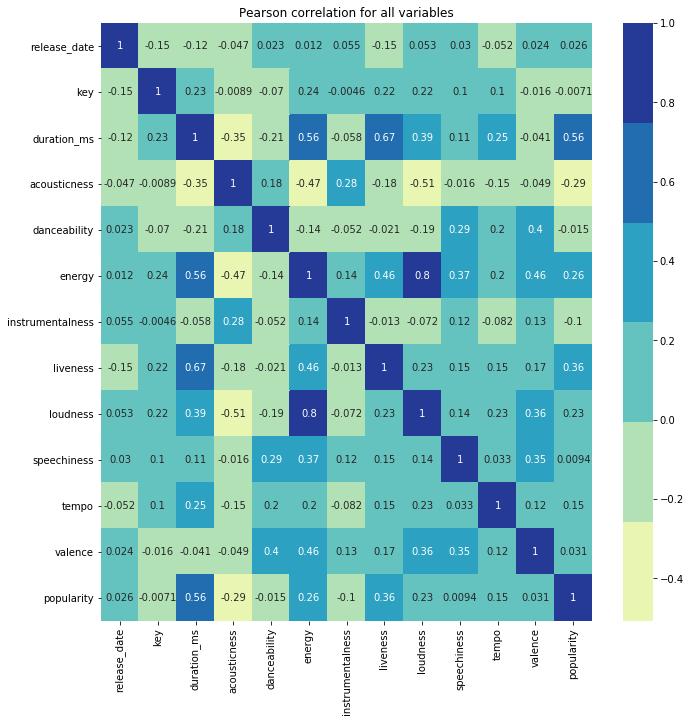

In [24]:
corrMatrix = songstats_analyzable.corr(method = "pearson")

x = sns.color_palette("YlGnBu")

fig, ax = plt.subplots(figsize=(11,11))
rsqMatrix = corrMatrix.applymap(lambda x: x)


sns.heatmap(rsqMatrix, annot=True, cmap = x)
plt.title("Pearson correlation for all variables")
plt.show()

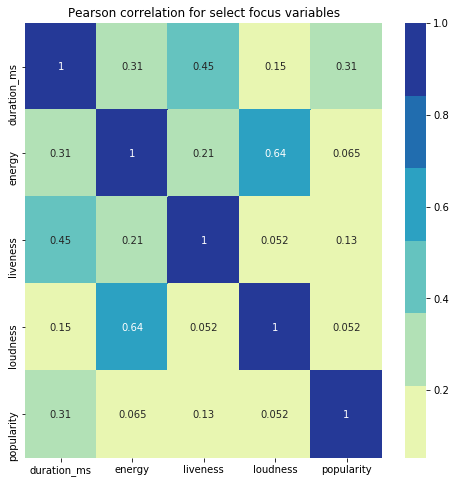

In [22]:
songstats_focus = songstats_analyzable.drop(["key", "danceability", "tempo", "valence", "release_date", "acousticness", "speechiness", "instrumentalness"], axis = 1)
songstats_focus

corrMatrix = songstats_focus.corr(method = "pearson")

rsqMatrix = corrMatrix.applymap(lambda x: x**2)


x = sns.color_palette("YlGnBu")
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(rsqMatrix, annot=True, cmap = x)
plt.title("Pearson correlation for select focus variables")
plt.show()

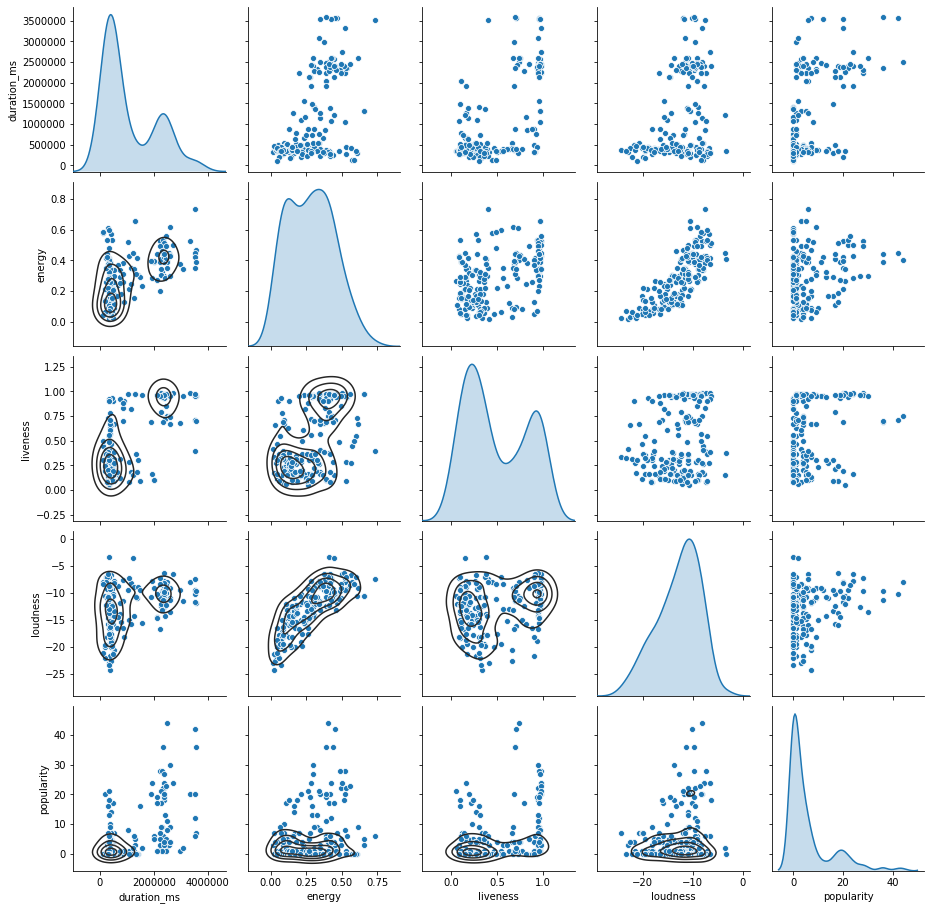

In [23]:
g = sns.pairplot(songstats_focus, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

plt.savefig('the5.png')